In [3]:
import numpy as np
from importlib import reload
import time
import ann

In [4]:
import cnn

In [80]:
training_input = np.load('training_input.npy')
training_output = np.load('training_output.npy')
test_input = np.load('test_input.npy')
test_output = np.load('test_output.npy')
validation_input = np.load('validation_input.npy')
validation_output = np.load('validation_output.npy')
weights0 = np.load('weights0.npy')
weights1 = np.load('weights1.npy')
biases0 = np.load('biases0.npy')
biases1 = np.load('biases1.npy')

In [71]:
ndim_input = 784
ndim_output = 10
n_training = training_input.shape[0]
n_test = test_input.shape[0]
n_validation = validation_input.shape[0]
training_data = (training_input.reshape(n_training, ndim_input), training_output)
test_data = (test_input.reshape(n_test, ndim_input), test_output)
validation_data = (validation_input.reshape(n_validation, ndim_input), validation_output)


In [497]:
small_training = (training_input.reshape(n_training, ndim_input)[0:20000], training_output[0:20000])

In [503]:
20000.*0.985

19700.0

In [434]:
reload(ann)
reload(ann)

<module 'ann' from '/Users/Benjamin/Code/BGT-Cosmology/DeepLearning/ann.py'>

In [470]:
n_neurons = np.array([40])
net = ann.Network(ndim_input, ndim_output, n_neurons, cfunc='crossentropy')
net.set_mini_batch_size(10)
net.max_epochs = 15
net.stepsize = 1.5
net.reg_lambda = 1.0

In [511]:
net.stepsize = 0.025
net.reg_lambda = 5.0
#net.set_mini_batch_size(10)
t0 = time.time()
net.SGD(small_training, test_data=test_data)
t1 = time.time()
print("Time lapsed {0:6.3f} secs.".format(t1-t0))
#print("Time for backprop {0} secs.".format(net.time_test))

Epoch 0: 9677 / 10000
Epoch 1: 9677 / 10000
Epoch 2: 9681 / 10000
Epoch 3: 9671 / 10000
Epoch 4: 9668 / 10000
Epoch 5: 9669 / 10000
Epoch 6: 9672 / 10000
Epoch 7: 9668 / 10000
Epoch 8: 9671 / 10000
Epoch 9: 9673 / 10000
Epoch 10: 9671 / 10000
Epoch 11: 9669 / 10000
Epoch 12: 9674 / 10000
Epoch 13: 9676 / 10000
Epoch 14: 9670 / 10000
Time lapsed 21.599 secs.


In [449]:
net.stepsize = 0.05
net.reg_lambda = 10.0
t0 = time.time()
net.SGD(new_training, test_data=validation_data)
t1 = time.time()
print("Time lapsed {0:6.3f} secs.".format(t1-t0))
#print("Time for backprop {0} secs.".format(net.time_test))

Epoch 0: 9728 / 10000
Epoch 1: 9730 / 10000
Epoch 2: 9719 / 10000
Epoch 3: 9728 / 10000
Epoch 4: 9724 / 10000
Epoch 5: 9735 / 10000
Epoch 6: 9732 / 10000
Epoch 7: 9727 / 10000


KeyboardInterrupt: 

In [433]:
net.stepsize = 0.1
net.reg_lambda = 4.0
#net.max_epochs = 5
t0 = time.time()
net.SGD(new_training, test_data=validation_data)
t1 = time.time()
print("Time lapsed {0:6.3f} secs.".format(t1-t0))
print("Time for backprop {0} secs.".format(net.time_test))

Epoch 0: 9763 / 10000
Epoch 1: 9761 / 10000
Epoch 2: 9757 / 10000
Epoch 3: 9758 / 10000
Epoch 4: 9759 / 10000
Epoch 5: 9766 / 10000
Epoch 6: 9751 / 10000
Epoch 7: 9758 / 10000
Epoch 8: 9752 / 10000
Epoch 9: 9750 / 10000
Time lapsed 189.780 secs.
Time for backprop [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] secs.


In [133]:
net.weights[0] = weights0
net.weights[1] = weights1

In [273]:
(27.094-20.947)/27.094

0.2268767992913561

In [170]:
net.stepsize = 0.5

In [120]:
np.arange(2, 1+1)

array([], dtype=int64)

In [124]:
net.biases

[array([-1.32596952, -2.29788466, -1.78491858, -0.93977051, -0.45911218,
        -0.15265579, -1.03717527, -1.38248311, -0.6207152 , -1.49550663,
         0.41140483, -2.07847094,  0.05613795, -0.21217033, -2.34845452,
        -1.38347709,  0.14698045,  0.73149754, -0.07418854, -0.18458663,
        -0.76921836, -0.91747116, -0.38877689, -0.46629811,  0.1342207 ,
        -0.74610908, -0.15949135,  0.47970372,  0.6201742 , -0.88905277]),
 array([-2.22295905, -2.01290063, -2.16464185, -2.1936819 , -2.28016825,
        -2.29402283, -2.21463534, -2.17809258, -2.26137436, -2.18480543])]

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

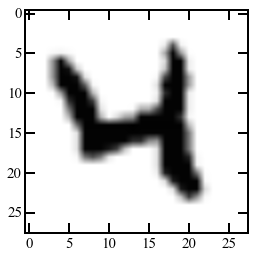

In [131]:
plt.imshow(training_input[20,:].reshape(28,28),cmap = plt.cm.Greys)

In [130]:
training_output[20]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [378]:
from scipy.ndimage.interpolation import rotate

In [381]:
x = rotate(training_input[20,:].reshape(28,28), 10.)

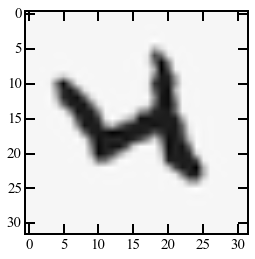

In [382]:
plt.imshow(x,cmap = plt.cm.Greys)

In [427]:
angle = (np.random.rand(training_data[0].shape[0])-0.5)*32.

In [384]:
angle

array([ -1.10600835,   8.396454  ,  10.42451877, ...,  -9.39204958,
       -10.66636042,  -9.05688894])

In [392]:
tnew = training_data[0]

In [428]:
for i in np.arange(tnew.shape[0]):
    tnew[i,:] = rotate(training_data[0][i].reshape(28,28), angle[i], reshape=False).reshape(784)

In [5]:
new_training = (np.r_[training_data[0], tnew], np.r_[training_data[1], training_data[1]])

NameError: name 'training_data' is not defined